<a href="https://colab.research.google.com/github/namne21123-ops/New-with-ENGR-Lead-Inventory-Op-Operations-Research./blob/main/Project_1_Demand_Analyzer_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
# Project 1 - First Project to Practice
import pandas as pd

# I have designed this data to have specific patterns:
# Widget A: Stable demand (Low Standard Deviation)
# Widget B: Volatile/Spiky demand (High Standard Deviation)
# Widget C: Trending Upwards (Demand increases over time)

csv_content = """Date,Product,Demand
2023-01-01,Widget A,100
2023-01-02,Widget A,102
2023-01-03,Widget A,98
2023-01-04,Widget A,101
2023-01-05,Widget A,99
2023-01-06,Widget A,100
2023-01-07,Widget A,103
2023-01-08,Widget A,97
2023-01-09,Widget A,100
2023-01-10,Widget A,100
2023-01-01,Widget B,50
2023-01-02,Widget B,150
2023-01-03,Widget B,60
2023-01-04,Widget B,140
2023-01-05,Widget B,40
2023-01-06,Widget B,160
2023-01-07,Widget B,55
2023-01-08,Widget B,145
2023-01-09,Widget B,45
2023-01-10,Widget B,155
2023-01-01,Widget C,20
2023-01-02,Widget C,25
2023-01-03,Widget C,30
2023-01-04,Widget C,35
2023-01-05,Widget C,40
2023-01-06,Widget C,45
2023-01-07,Widget C,50
2023-01-08,Widget C,55
2023-01-09,Widget C,60
2023-01-10,Widget C,65
"""

# Write the text above to a file named 'demand_data.csv'
with open('demand_data.csv', 'w') as f:
    f.write(csv_content)

print("✅ File 'demand_data.csv' has been created with fixed data.")

✅ File 'demand_data.csv' has been created with fixed data.


--- Data Snapshot ---
        Date   Product  Demand
0 2023-01-01  Widget A     100
1 2023-01-02  Widget A     102
2 2023-01-03  Widget A      98
3 2023-01-04  Widget A     101
4 2023-01-05  Widget A      99


--- Summary Statistics ---
           mean    std  max
Product                    
Widget A  100.0   1.76  103
Widget B  100.0  53.23  160
Widget C   42.5  15.14   65




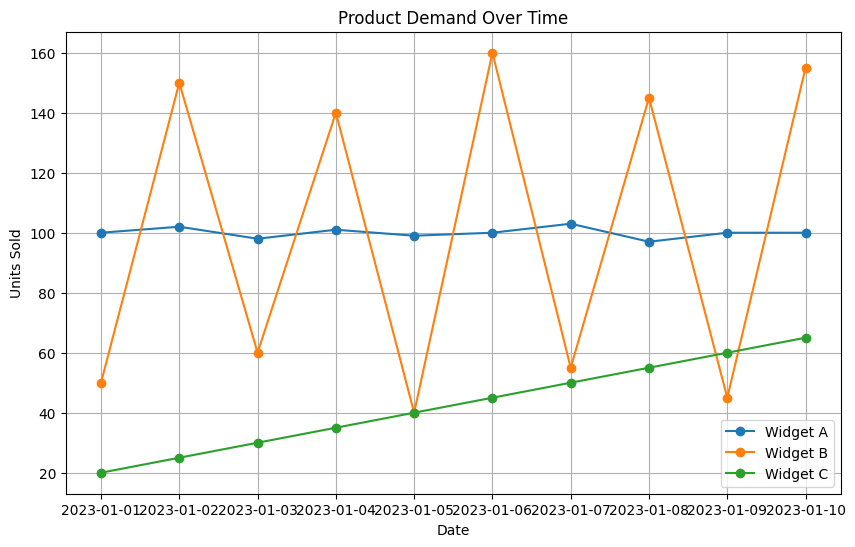

--- Final Inventory Recommendations ---
           mean   std  max  Safety_Stock  Order_Quantity
Product                                                 
Widget A  100.0   2.0  103           4.0           104.0
Widget B  100.0  53.0  160         106.0           206.0
Widget C   42.0  15.0   65          30.0            73.0
--- The Recommendation Goods Order (Based on risks and trends ---
           mean        std  Order_Quantity
Product                                   
Widget A  100.0   1.763834      103.527668
Widget B  100.0  53.229065      206.458129
Widget C   42.5  15.138252       72.776504


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('demand_data.csv')

df['Date'] = pd.to_datetime(df['Date'])

print("--- Data Snapshot ---")
print(df.head())
print("\n")

summary_stats = df.groupby('Product')['Demand'].agg(['mean', 'std', 'max'])

print("--- Summary Statistics ---")
# Round to 2 decimal places
print(summary_stats.round(2))
print("\n")

plt.figure(figsize=(10, 6))

for product_name in df['Product'].unique():
  product_data = df[df['Product'] == product_name]

  plt.plot(product_data['Date'], product_data['Demand'], marker='o', label=product_name)


plt.title('Product Demand Over Time')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.legend()
plt.grid(True)
plt.show()


summary_stats['Safety_Stock'] = summary_stats['std'] * 2

summary_stats['Order_Quantity'] = summary_stats['mean'] + summary_stats['Safety_Stock']

print("--- Final Inventory Recommendations ---")
print(summary_stats.round(0))

print("--- The Recommendation Goods Order (Based on risks and trends ---")
print(summary_stats[['mean', 'std', 'Order_Quantity']])

Index(['Date', 'Branch', 'Customer type', 'Gender', 'Product line',
       'Unit price', 'Quantity', 'Payment', 'Rating'],
      dtype='object')
       Date     Branch Customer type  Gender      Product line  Unit price  \
0  1/1/2024   Brooklyn        Member  Female  Food & Beverages       84.63   
1  1/1/2024     Queens        Normal  Female       Electronics       63.22   
2  1/1/2024   Brooklyn        Normal  Female       Electronics       74.71   
3  1/1/2024     Queens        Member  Female   Sports & Travel       36.98   
4  1/1/2024  Manhattan        Member  Female   Sports & Travel       27.04   

   Quantity      Payment  Rating  
0        10  Credit card     9.0  
1         2         Cash     8.5  
2         6         Cash     6.7  
3        10  Credit card     7.0  
4         4      Ewallet     6.9  
--- Changed Date to Datetime Successfully ---
                      mean       std  max
Product line                             
Electronics       5.000000  2.991367   10
Fash

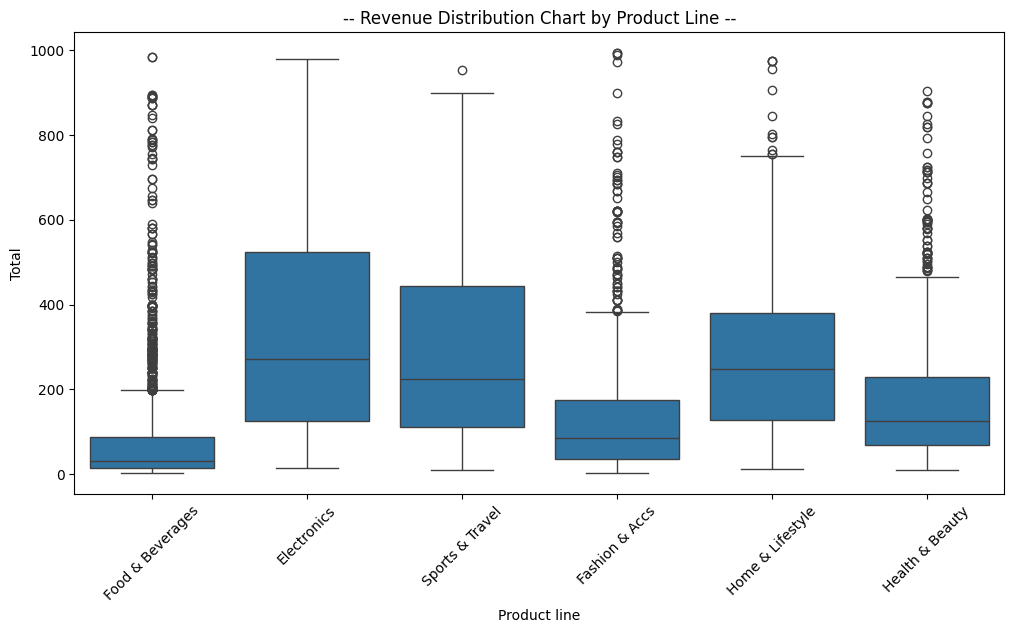

-- Report by PAYMENT method --
                   sum        mean  count
Payment                                  
Cash         304622.65  181.972909   1674
Credit card  311230.89  195.251499   1594
Ewallet      326691.31  183.020342   1785


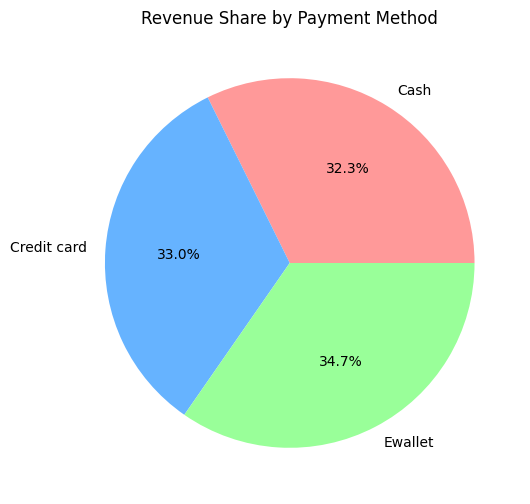

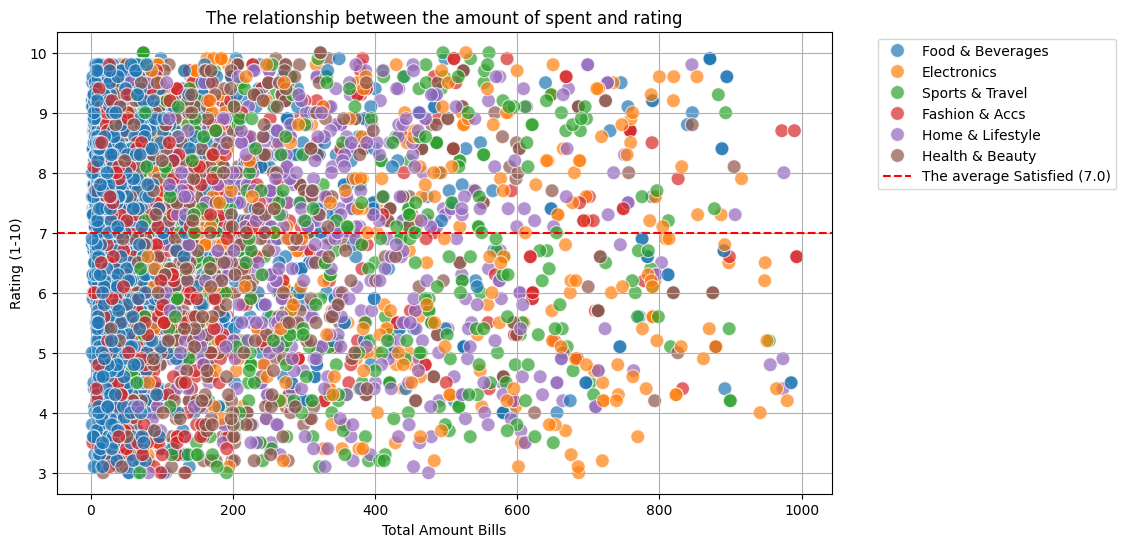

In [20]:
# Project 1 - Second Project to practice

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv('/content/Supermarket Sales 2.csv')

print(df.columns)
print(df.head())

df['Date'] = pd.to_datetime(df['Date'])

# Calculate 'Total' column
df['Total'] = df['Unit price'] * df['Quantity']

print("--- Changed Date to Datetime Successfully ---")

summary_stats = df.groupby('Product line')['Quantity'].agg(['mean', 'std', 'max'])

print(summary_stats)
print(summary_stats.round(2))
print("\n")

revenue_stats = df.groupby('Product line')['Total'].agg(['mean', 'std', 'sum'])

revenue_stats = revenue_stats.sort_values(by='std', ascending=False)

print("--- Analyze Revenue Risk ---")
print(revenue_stats.round(2))

plt.figure(figsize=(12, 6))

sns.boxplot(x='Product line', y='Total', data=df)

plt.title('-- Revenue Distribution Chart by Product Line --')
plt.xticks(rotation=45)
plt.show()

if 'Total' not in df.columns:
  df['Total'] = df['Unit price'] * df['Quantity']
  print("-- Automatically Checking and add the Data --")

payment_stats = df.groupby('Payment')['Total'].agg(['sum', 'mean', 'count'])

print("-- Report by PAYMENT method --")
print(payment_stats)

plt.figure(figsize=(10, 6))

payment_stats['sum'].plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff','#99ff99'])

plt.title('Revenue Share by Payment Method')
plt.ylabel('')
plt.show()

plt.figure(figsize=(10, 6))

sns.scatterplot(x='Total', y='Rating', hue='Product line', data=df, s=100, alpha=0.7)

plt.axhline(y=7, color='red', linestyle='--', label='The average Satisfied (7.0)')

plt.title('The relationship between the amount of spent and rating')
plt.xlabel('Total Amount Bills')
plt.ylabel('Rating (1-10)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
